<a href="https://colab.research.google.com/github/MoonlightO2/Movie-Analysis-Recommendation/blob/main/YouTube_Movie_Analysis_%26_Recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **YouTube Movie Analysis & Recommendation**
***Datasets***: https://www.kaggle.com/datasets/datasnaek/youtube-new

### **1. Data Preprocessing**

In [ ]:
# Import necessary libraries
import os
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

In [ ]:
# Load the data
folder_path = '/content/drive/MyDrive/2. Projects/Colab Notebooks/Portfolio/Movies & TV/YouTube/'
data_path = '/content/drive/MyDrive/2. Projects/Colab Notebooks/Portfolio/Movies & TV/YouTube.csv'

In [ ]:
# Get all files in the folder
all_files = os.listdir(folder_path)

# Filter CSV and JSON files
csv_files = [file for file in all_files if file.endswith('.csv')]

# Print the names of CSV files
print("CSV Files:")
for csv_file in csv_files:
    print(csv_file)

CSV Files:
CAvideos.csv
DEvideos.csv
FRvideos.csv
GBvideos.csv
INvideos.csv
USvideos.csv


In [ ]:
'''
# Get a list of all CSV files in the folder
csv_files = [file for file in os.listdir(folder_path) if file.endswith('.csv')]

# Create an empty DataFrame to store the combined data
combined_data = pd.DataFrame()

# Iterate through each CSV file
for file in csv_files:
    # Read the CSV file
    file_path = os.path.join(folder_path, file)
    df = pd.read_csv(file_path, encoding='latin1')

    # Add a 'country' column with the value of the file name (excluding the extension)
    df['country'] = os.path.splitext(file)[0]

    # Concatenate the data to the combined DataFrame
    combined_data = pd.concat([combined_data, df], ignore_index=True)

# Save the combined DataFrame to a new CSV file if needed
combined_data.to_csv(data_path, index=False)
print('File created in', data_path)
'''

"\n# Get a list of all CSV files in the folder\ncsv_files = [file for file in os.listdir(folder_path) if file.endswith('.csv')]\n\n# Create an empty DataFrame to store the combined data\ncombined_data = pd.DataFrame()\n\n# Iterate through each CSV file\nfor file in csv_files:\n    # Read the CSV file\n    file_path = os.path.join(folder_path, file)\n    df = pd.read_csv(file_path, encoding='latin1')\n\n    # Add a 'country' column with the value of the file name (excluding the extension)\n    df['country'] = os.path.splitext(file)[0]\n\n    # Concatenate the data to the combined DataFrame\n    combined_data = pd.concat([combined_data, df], ignore_index=True)\n\n# Save the combined DataFrame to a new CSV file if needed\ncombined_data.to_csv(data_path, index=False)\nprint('File created in', data_path)\n"

In [ ]:
youtube_data = pd.read_csv(data_path)
print('Shape: ', youtube_data.shape, '\n')
print('Columns: ', youtube_data.columns.tolist(), '\n')
youtube_data.head()

Shape:  (242232, 17) 

Columns:  ['video_id', 'trending_date', 'title', 'channel_title', 'category_id', 'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count', 'thumbnail_link', 'comments_disabled', 'ratings_disabled', 'video_error_or_removed', 'description', 'country'] 



,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10.0,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579.0,787425.0,43420.0,125882.0,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,CAvideos
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23.0,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651.0,127794.0,1688.0,13030.0,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,CAvideos
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23.0,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434.0,146035.0,5339.0,8181.0,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...,CAvideos
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24.0,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828.0,132239.0,1989.0,17518.0,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,CAvideos
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10.0,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622.0,1634130.0,21082.0,85067.0,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,ð§: https://ad.gt/yt-perfect\nð°: https://...,CAvideos


In [ ]:
youtube_data.describe()

,category_id,views,likes,dislikes,comment_count
count,239662.000000,2.396620e+05,2.396620e+05,2.396620e+05,2.396620e+05
mean,20.002950,1.898465e+06,5.218776e+04,2.849046e+03,5.632043e+03
std,7.271423,8.746280e+06,1.950500e+05,2.703692e+04,2.951592e+04
min,1.000000,2.230000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,17.000000,8.385125e+04,1.277000e+03,7.300000e+01,1.760000e+02
50%,24.000000,3.082685e+05,6.522000e+03,2.960000e+02,7.910000e+02
75%,24.000000,1.041631e+06,2.895575e+04,1.126000e+03,3.043000e+03
max,44.000000,4.245389e+08,5.613827e+06,1.944971e+06,1.626501e+06


In [ ]:
columns = ['video_id', 'trending_date', 'title', 'channel_title', 'category_id', 'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count', 'thumbnail_link', 'comments_disabled', 'ratings_disabled', 'video_error_or_removed', 'description', 'country']

formatted_columns = [column.replace('_', ' ').title() for column in columns]

# Rename columns using the mapping dictionary
youtube_data.columns = formatted_columns

# Display the modified DataFrame
print("Modified DataFrame:")
youtube_data.head()

Modified DataFrame:


,Video Id,Trending Date,Title,Channel Title,Category Id,Publish Time,Tags,Views,Likes,Dislikes,Comment Count,Thumbnail Link,Comments Disabled,Ratings Disabled,Video Error Or Removed,Description,Country
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10.0,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579.0,787425.0,43420.0,125882.0,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,CAvideos
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23.0,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651.0,127794.0,1688.0,13030.0,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,CAvideos
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23.0,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434.0,146035.0,5339.0,8181.0,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...,CAvideos
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24.0,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828.0,132239.0,1989.0,17518.0,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,CAvideos
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10.0,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622.0,1634130.0,21082.0,85067.0,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,ð§: https://ad.gt/yt-perfect\nð°: https://...,CAvideos


In [ ]:
print(youtube_data.columns.tolist())

['Video Id', 'Trending Date', 'Title', 'Channel Title', 'Category Id', 'Publish Time', 'Tags', 'Views', 'Likes', 'Dislikes', 'Comment Count', 'Thumbnail Link', 'Comments Disabled', 'Ratings Disabled', 'Video Error Or Removed', 'Description', 'Country']


In [ ]:
columns_to_check = ['Video Id', 'Trending Date', 'Title', 'Channel Title', 'Category Id', 'Publish Time', 'Tags', 'Views', 'Likes', 'Dislikes', 'Comment Count', 'Thumbnail Link', 'Comments Disabled', 'Ratings Disabled', 'Video Error Or Removed', 'Description', 'Country']

for column in columns_to_check:
    unique_values = youtube_data[column].unique()
    count_unique_values = youtube_data[column].nunique()

    print(f"Column: {column}")
    print(f"Count of Unique Values: {count_unique_values}")
    print(f"Unique Values: {unique_values}")
    print("\n")

Column: Video Id
Count of Unique Values: 94345
Unique Values: ['n1WpP7iowLc' '0dBIkQ4Mz1M' '5qpjK5DgCt4' ... 'qPEIPu0V8GQ' 'dS5Thrl-4Kc'
 'yz7Xq3T0YPs']


Column: Trending Date
Count of Unique Values: 211
Unique Values: ['17.14.11' '17.15.11' '17.16.11' '17.17.11' '17.18.11' '17.19.11' nan
 'CAvideos' '17.20.11' '17.21.11' '17.22.11' '17.23.11' '17.24.11'
 '17.25.11' '17.26.11' '17.27.11' '17.28.11' '17.29.11' '17.30.11'
 '17.01.12' '17.02.12' '17.03.12' '17.04.12' '17.05.12' '17.06.12'
 '17.07.12' '17.08.12' '17.09.12' '17.10.12' '17.11.12' '17.12.12'
 '17.13.12' '17.14.12' '17.15.12' '17.16.12' '17.17.12' '17.18.12'
 '17.19.12' '17.20.12' '17.21.12' '17.22.12' '17.23.12' '17.24.12'
 '17.25.12' '17.26.12' '17.27.12' '17.28.12' '17.29.12' '17.30.12'
 '17.31.12' '18.01.01' '18.02.01' '18.03.01' '18.04.01' '18.05.01'
 '18.06.01' '18.07.01' '18.08.01' '18.09.01' '18.12.01' '18.13.01'
 '18.14.01' '18.15.01' '18.16.01' '18.17.01' '18.18.01' '18.19.01'
 '18.20.01' '18.21.01' '18.22.01' '18.2

In [ ]:
# Check for missing values and show only columns with null values
null_columns = youtube_data.columns[youtube_data.isnull().any()]
null_values = youtube_data[null_columns].isnull().sum()

if null_values.empty:
    print("No null values found in the specified columns.")
else:
    print("Null values found in the following columns:")
    print(null_values)

Null values found in the following columns:
Trending Date              2124
Title                      2570
Channel Title              2570
Category Id                2570
Publish Time               2570
Tags                       2570
Views                      2570
Likes                      2570
Dislikes                   2570
Comment Count              2570
Thumbnail Link             2570
Comments Disabled          2570
Ratings Disabled           2570
Video Error Or Removed     2570
Description               10073
Country                    3016
dtype: int64


In [ ]:
missing_data = ['Video Id', 'Trending Date', 'Title', 'Channel Title', 'Category Id', 'Publish Time', 'Tags', 'Views', 'Likes', 'Dislikes', 'Comment Count', 'Thumbnail Link', 'Comments Disabled', 'Ratings Disabled', 'Video Error Or Removed', 'Description', 'Country']

# Fill missing values with the mode for categorical columns
for column in missing_data:
    youtube_data[column].fillna(youtube_data[column].mode()[0], inplace=True)

### **2. Exploratary Data Analysis (EDA)**

**1. Data Cleaning**

In [ ]:
# Check for missing values and show only columns with null values
null_columns = youtube_data.columns[youtube_data.isnull().any()]
null_values = youtube_data[null_columns].isnull().sum()

if null_values.empty:
    print("No null values found in the specified columns.")
else:
    print("Null values found in the following columns:")
    print(null_values)

No null values found in the specified columns.


In [ ]:
# Function to handle date parsing with multiple formats
def parse_date(date_str):
    try:
        return pd.to_datetime(date_str, errors='raise')
    except ValueError:
        # Handle the error by applying a custom parsing logic
        # Adjust this based on the actual date format variations in your data
        date_parts = date_str.split('.')
        if len(date_parts) == 3 and len(date_parts[2]) == 4:  # Check if the date has three parts and the year has four digits
            return pd.to_datetime(f'{date_parts[2]}-{date_parts[1]}-{date_parts[0]}', errors='coerce')
        else:
            return pd.to_datetime(date_str, errors='coerce')

# Apply the function to the 'Publish Time' column
youtube_data['Trending Date'] = youtube_data['Trending Date'].apply(parse_date)
youtube_data['Publish Time'] = youtube_data['Publish Time'].apply(parse_date)

# Check for missing values after parsing
print(youtube_data['Trending Date'].isnull().sum())
print(youtube_data['Publish Time'].isnull().sum())

152468
0


In [ ]:
# Convert date-related columns to datetime
youtube_data['Trending Date'] = pd.to_datetime(youtube_data['Trending Date'])
youtube_data['Publish Time'] = pd.to_datetime(youtube_data['Publish Time'])

**Handle outliers**

In [ ]:
# Function to identify and handle outliers using IQR
def handle_outliers(data, column):
    # Calculate IQR
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define upper and lower bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = (data[column] < lower_bound) | (data[column] > upper_bound)

    # Handle outliers (in this example, we are replacing them with the median)
    data.loc[outliers, column] = data[column].median()

    return data

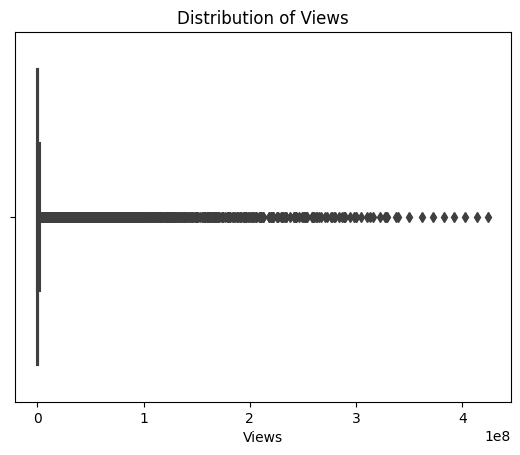

In [ ]:
# Choose a numerical column to handle outliers (e.g., 'Views')
column_to_handle = 'Views'

# Visualize the distribution before handling outliers
sns.boxplot(x=youtube_data[column_to_handle])
plt.title(f'Distribution of {column_to_handle}')
plt.show()

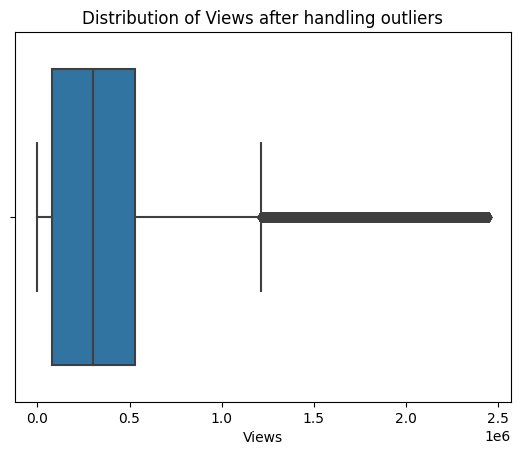

In [ ]:
# Handle outliers
youtube_data = handle_outliers(youtube_data, column_to_handle)

# Visualize the distribution after handling outliers
sns.boxplot(x=youtube_data[column_to_handle])
plt.title(f'Distribution of {column_to_handle} after handling outliers')
plt.show()

**2. Descriptive Statistics**

              Views         Likes      Dislikes  Comment Count
count  2.422320e+05  2.422320e+05  2.422320e+05   2.422320e+05
mean   4.284290e+05  5.163407e+04  2.818819e+03   5.572289e+03
std    5.068884e+05  1.940862e+05  2.689469e+04   2.936459e+04
min    2.230000e+02  0.000000e+00  0.000000e+00   0.000000e+00
25%    7.967600e+04  1.198000e+03  6.900000e+01   1.640000e+02
50%    3.011090e+05  6.312000e+03  2.880000e+02   7.690000e+02
75%    5.323712e+05  2.844275e+04  1.107000e+03   2.987000e+03
max    2.447055e+06  5.613827e+06  1.944971e+06   1.626501e+06


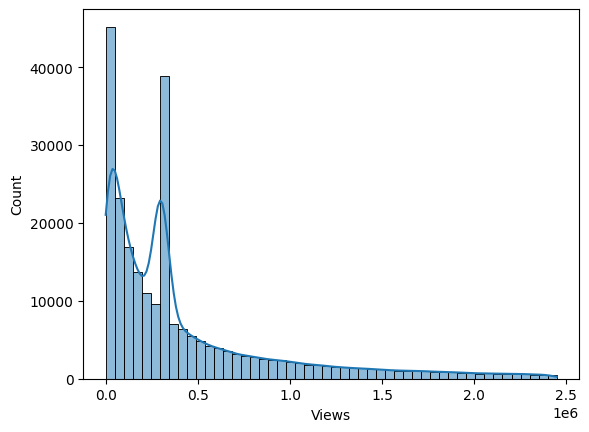

In [ ]:
# Calculate basic statistics
print(youtube_data[['Views', 'Likes', 'Dislikes', 'Comment Count']].describe())

# Explore distribution with histograms or box plots
sns.histplot(youtube_data['Views'], bins=50, kde=True)
plt.show()

**3. Temporal Analysis**

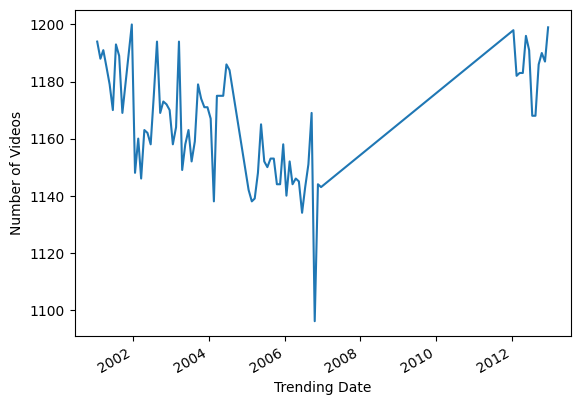

In [ ]:
# Plot the number of trending videos per day
daily_trend = youtube_data.groupby('Trending Date').size()
daily_trend.plot(kind='line')
plt.xlabel('Trending Date')
plt.ylabel('Number of Videos')
plt.show()

**4. Category-wise Analysis**

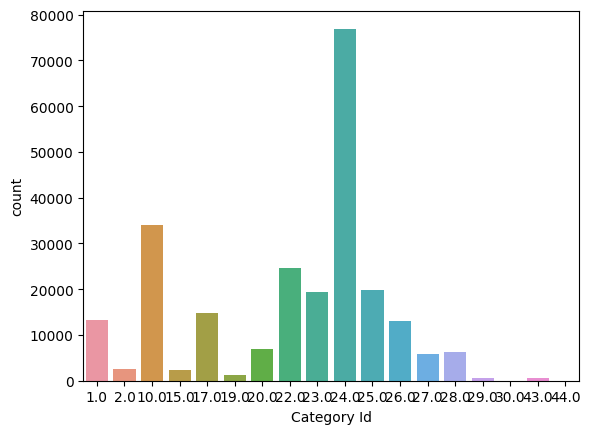

In [ ]:
# Distribution of videos across different categories
sns.countplot(x='Category Id', data=youtube_data)
plt.show()

**5. Channel-wise Analysis**

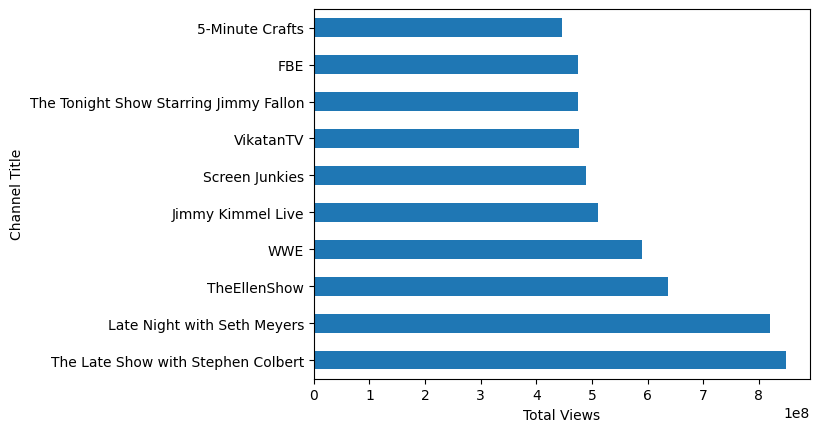

In [ ]:
# Identify top channels based on views
top_channels = youtube_data.groupby('Channel Title')['Views'].sum().sort_values(ascending=False).head(10)
top_channels.plot(kind='barh')
plt.xlabel('Total Views')
plt.show()

**6. Word Cloud**

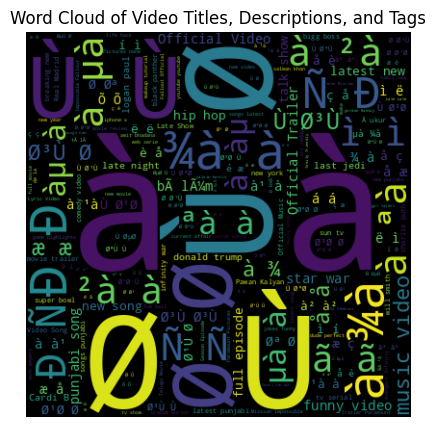

In [ ]:
# Combine text features (Title, Description, Tags) into a single string
text_data = ' '.join(youtube_data['Title'] + ' ' + youtube_data['Tags'].fillna(''))

# Generate a WordCloud
wordcloud = WordCloud(width=400, height=400, background_color='black').generate(text_data)

# Plot the WordCloud
plt.figure(figsize=(5, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Video Titles, Descriptions, and Tags')
plt.show()

### **3. Content-Based Recommendation System**

In [ ]:
# 1. Create a content-based vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
youtube_data['TextFeatures'] = youtube_data['Title'] + ' ' + youtube_data['Description'] + ' ' + youtube_data['Tags'].fillna('')

In [ ]:
# 2. Fit and transform the vectorizer
tfidf_matrix = tfidf_vectorizer.fit_transform(youtube_data['TextFeatures'])

In [ ]:
print("Before calculating cosine similarity")
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
print("After calculating cosine similarity")
print(cosine_sim)

In [ ]:
# 4. Function to get recommendations
def get_recommendations(title):
    idx = youtube_data[youtube_data['Title'] == title].index[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]  # Exclude the video itself
    video_indices = [i[0] for i in sim_scores]
    return youtube_data['Title'].iloc[video_indices]

In [ ]:
# 5. Test the recommendation function - User interface
user_input = input("Movie Name: ")

try:
    recommended_videos = get_recommendations(user_input)
    print("\nRecommended Videos:")
    print(recommended_videos)
except IndexError:
    print("Movie not found. Please try another one.")